In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_excel(r"D:\Intership\Python\12-05-25\practice_data.xlsx")
data1 = pd.DataFrame(Data)
data1

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes
5,6,Male,Sales,21,High,Yes,95,8,8,89988,No
6,7,Female,Marketing,24,Low,No,70,5,4,70934,Yes
7,8,Male,Human Resources,18,Medium,Yes,80,6,6,96578,No
8,9,Male,Engineering,20,High,Yes,90,8,7,74219,No
9,10,Female,Finance,22,Medium,Yes,85,7,6,87009,Yes


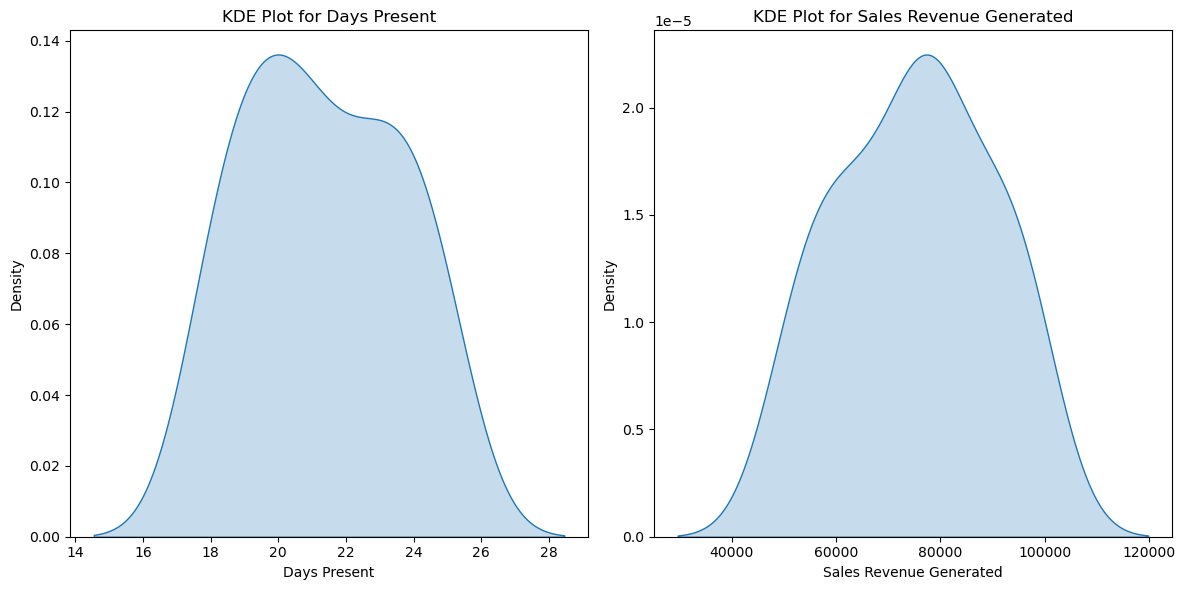

In [3]:
numeric_columns = ['Days Present', 'Sales Revenue Generated']
num_row, num_col = 1, 2  
fig, axes = plt.subplots(num_row, num_col, figsize=(12, 6))  
axes = axes.flatten()

for index, column in enumerate(numeric_columns):
    sns.kdeplot(data1[column], ax=axes[index], fill=True)
    axes[index].set_title(f'KDE Plot for {column}')

plt.tight_layout()
plt.show()


In [4]:
Highest_number = data1["Sales Revenue Generated"].max()
print("Highest_number",Highest_number)

Highest_number 97797


In [5]:
lowest_number = data1["Sales Revenue Generated"].min()
print("lowest_number",lowest_number)

lowest_number 51638


# Boxcox

In [6]:
from scipy.stats import boxcox
from scipy.stats import shapiro

AxesSubplot(0.125,0.11;0.775x0.77)
P value:  0.014791046269237995


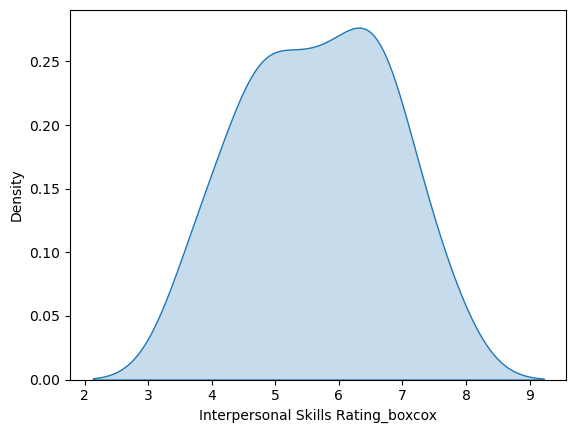

In [7]:
def boxcox_transformation(data, column_name):
    transformed_data, _ = boxcox(data[column_name])
    data[f'{column_name}_boxcox'] = transformed_data
    stat, p_value = shapiro(data[f'{column_name}_boxcox'])
    kdeplot = sns.kdeplot(data[f'{column_name}_boxcox'], fill= True)
    print(kdeplot)
    print('P value: ', p_value)
    
df= pd.read_excel(r"D:\Intership\Python\12-05-25\practice_data.xlsx")
boxcox_transformation(df,'Interpersonal Skills Rating')

# Yeojohnson

In [8]:
from scipy.stats import yeojohnson


AxesSubplot(0.125,0.11;0.775x0.77)
P value:  0.347298800945282


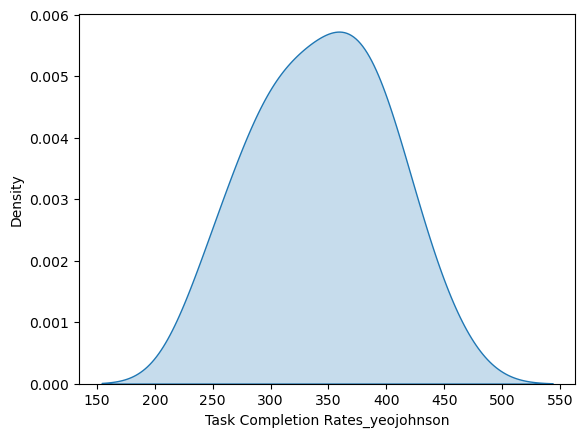

In [9]:
def yeojohnson_transformation(data, column_name):
    transformed_data, _ =yeojohnson(data[column_name])
    data[f'{column_name}_yeojohnson'] = transformed_data
    stat, p_value = shapiro(data[f'{column_name}_yeojohnson'])
    kdeplot = sns.kdeplot(data[f'{column_name}_yeojohnson'], fill= True)
    print(kdeplot)
    print('P value: ', p_value)
    
df= pd.read_excel(r"D:\Intership\Python\12-05-25\practice_data.xlsx")
yeojohnson_transformation(df,'Task Completion Rates')

# One sample t-test


In [10]:
 from scipy import stats

In [11]:
hypothesis_mean = 68
t_statistic, p_value = stats.ttest_1samp(df['Task Completion Rates'], hypothesis_mean)
print("P-value:", p_value)

P-value: 4.285575154114236e-06


In [12]:
alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the average purchase amount and 68.")
else:
        print("Fail to reject the null hypothesis. There is no significant difference between the average purchase amount and 68.")

Reject the null hypothesis. There is a significant difference between the average purchase amount and 68.


#  Independent sample t-test

In [13]:
churned = data1.query('`Meeting Project Deadlines` == "Yes"')['Sales Revenue Generated']
existing = data1.query('`Meeting Project Deadlines` == "No"')['Sales Revenue Generated']
t_statistic, p_value = stats.ttest_ind(churned, existing)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 0.7507998976045549
P-value: 0.45882236052850633


In [14]:
alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average purchase amount between churned and existing customers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average purchase amount between churned and existing customers.")

Fail to reject the null hypothesis. There is no significant difference in average purchase amount between churned and existing customers.


# One way ANOVA

In [15]:
Sales = data1.query('department == "Sales"')['Sales Revenue Generated']
Marketing = data1.query('department == "Marketing"')['Sales Revenue Generated']
Human_Resources = data1.query('department == "Human Resources"')['Sales Revenue Generated']
Engineering = data1.query('department == "Engineering"')['Sales Revenue Generated']
t_statistic, p_value = stats.f_oneway(Sales,Marketing,Human_Resources, Engineering )
print("P-value:", p_value)
print("t_statistic",t_statistic)

P-value: 0.8781324119619068
t_statistic 0.22463839847517397


In [16]:
alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average frequency of purchases among the customers from different cities.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average frequency of purchases among the customers from different cities.")

Fail to reject the null hypothesis. There is no significant difference in average frequency of purchases among the customers from different cities.


# Task 15/05/25

# Creating Total Purchase Amount Variable

In [17]:
data1['Total_Purchase_Amount'] = data1['Interpersonal Skills Rating'] * data1['Task Completion Rates']

In [18]:
data1['Total_Purchase_Amount']

0     680
1     630
2     720
3     450
4     595
5     760
6     350
7     480
8     720
9     595
10    675
11    420
12    560
13    720
14    325
15    450
16    680
17    560
18    630
19    390
20    525
21    680
22    300
23    420
24    640
25    390
26    525
27    680
28    300
29    420
30    640
Name: Total_Purchase_Amount, dtype: int64

# Creating Customer Lifetime Value Variable

In [19]:
data1['CLV'] = data1['Total_Purchase_Amount'] * data1['Sales Revenue Generated']

In [20]:
data1['CLV']

0     35113840
1     61612110
2     68645520
3     41312700
4     38226965
5     68390880
6     24826900
7     46357440
8     53437680
9     51770355
10    52504875
11    40824420
12    37928800
13    67267440
14    25080900
15    38581650
16    50912280
17    35417200
18    33496470
19    31890300
20    41203050
21    39328480
22    18865500
23    22083180
24    48508800
25    31890300
26    41203050
27    39328480
28    18865500
29    22083180
30    48508800
Name: CLV, dtype: int64

In [21]:
# Example list of date strings
date_list = ['2023-01-01', '2023-05-10', '2024-03-15']

# Convert to DataFrame
data = pd.DataFrame({'Date': pd.to_datetime(date_list)})

In [22]:
data

,Date
0,2023-01-01
1,2023-05-10
2,2024-03-15


In [23]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [24]:
data['year']
data['month']
data['day']

0     1
1    10
2    15
Name: day, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
data1

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned,Total_Purchase_Amount,CLV
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No,680,35113840
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes,630,61612110
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No,720,68645520
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No,450,41312700
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes,595,38226965
5,6,Male,Sales,21,High,Yes,95,8,8,89988,No,760,68390880
6,7,Female,Marketing,24,Low,No,70,5,4,70934,Yes,350,24826900
7,8,Male,Human Resources,18,Medium,Yes,80,6,6,96578,No,480,46357440
8,9,Male,Engineering,20,High,Yes,90,8,7,74219,No,720,53437680
9,10,Female,Finance,22,Medium,Yes,85,7,6,87009,Yes,595,51770355


In [27]:
encoder = LabelEncoder()
data1['encoded_feature'] = encoder.fit_transform(data1['department'])

In [28]:
data1['encoded_feature']

0     4
1     3
2     2
3     0
4     1
5     4
6     3
7     2
8     0
9     1
10    4
11    3
12    2
13    0
14    1
15    4
16    3
17    2
18    0
19    1
20    4
21    3
22    2
23    0
24    1
25    1
26    4
27    3
28    2
29    0
30    1
Name: encoded_feature, dtype: int32

In [29]:
# Sample data
data = pd.DataFrame({
    "Fruit": ["apple", "banana", "cherry", "apple", "banana"]
})

# Mapping dictionary
mapping = {"apple": 1, "banana": 2, "cherry": 3}

# Apply mapping
data["mapped_col"] = data["Fruit"].map(mapping)

# Display result
print(data)

    Fruit  mapped_col
0   apple           1
1  banana           2
2  cherry           3
3   apple           1
4  banana           2


In [30]:
# Example DataFrame
data = pd.DataFrame({
    'numeric_column': [10, 20, 35, 50, 75, 90]
})

# Define bin edges
bins = [0, 30, 60, 100]

# Define labels for the bins
labels = ['Low', 'Medium', 'High']

# Apply binning
data['binned_col'] = pd.cut(data['numeric_column'], 
                            bins=bins, 
                            labels=labels, 
                            include_lowest=True)

# Show result
print(data.head())

   numeric_column binned_col
0              10        Low
1              20        Low
2              35     Medium
3              50     Medium
4              75       High


In [31]:
data = pd.DataFrame({
    'cat_col_1': ['A', 'B', 'A'],
    'cat_col_2': ['X', 'Y', 'X']
})

# Create dummy variables for selected categorical columns
dummies = pd.get_dummies(data[['cat_col_1', 'cat_col_2']])

# Concatenate the dummies to the original DataFrame
data = pd.concat([data, dummies], axis=1)

# Display the result
print(data)

  cat_col_1 cat_col_2  cat_col_1_A  cat_col_1_B  cat_col_2_X  cat_col_2_Y
0         A         X            1            0            1            0
1         B         Y            0            1            0            1
2         A         X            1            0            1            0


# Task 16/05/25


In [34]:
encoder = LabelEncoder()
data1['gender'] = encoder.fit_transform(data1['gender'])
print("Gender encoding mapping:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
data1.head()

Gender encoding mapping: {'Female': 0, 'Male': 1}


,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned,Total_Purchase_Amount,CLV,encoded_feature
0,1,1,Sales,20,High,Yes,85,8,7,51638,No,680,35113840,4
1,2,0,Marketing,22,Medium,Yes,90,7,6,97797,Yes,630,61612110,3
2,3,1,Human Resources,25,High,No,80,9,8,95341,No,720,68645520,2
3,4,1,Engineering,19,Low,Yes,75,6,5,91806,No,450,41312700,0
4,5,0,Finance,23,Medium,Yes,85,7,7,64247,Yes,595,38226965,1


In [36]:
print("First value of the Gender column after encoding:", data1['gender'].iloc[0])


First value of the Gender column after encoding: 1


In [61]:
data1 = pd.read_excel(r"D:\Intership\Python\12-05-25\practice_data.xlsx")
X = data1.drop(['EmployeeID', 'churned'], axis=1)
y = data1['churned']

X_encoded = pd.get_dummies(X, drop_first=True)

print(X_encoded.head())
print(y())

   Days Present  Task Completion Rates  Interpersonal Skills Rating  \
0            20                     85                            8   
1            22                     90                            7   
2            25                     80                            9   
3            19                     75                            6   
4            23                     85                            7   

   Decision-Making Skills Rating  Sales Revenue Generated  gender_Male  \
0                              7                    51638            1   
1                              6                    97797            0   
2                              8                    95341            1   
3                              5                    91806            1   
4                              7                    64247            0   

   department_Finance  department_Human Resources  department_Marketing  \
0                   0                           0    

TypeError: 'Series' object is not callable

In [62]:
x = data1.drop(["EmployeeID"], axis=1)

In [77]:
x.head()

,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,Male,Sales,20,High,Yes,85,8,7,51638,No
1,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,Male,Human Resources,25,High,No,80,9,8,95341,No
3,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes


In [71]:
from sklearn.preprocessing import StandardScaler

In [79]:
Scaler = StandardScaler()
data1["Interpersonal Skills Rating"] = Scaler.fit_transform(data1[["Interpersonal Skills Rating"]])
data1["Interpersonal Skills Rating"].head()


0    0.857075
1    0.026784
2    1.687365
3   -0.803507
4    0.026784
Name: Interpersonal Skills Rating, dtype: float64

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
Scaler = MinMaxScaler()
data1["Sales Revenue Generated"] = Scaler.fit_transform(data1[["Sales Revenue Generated"]])
data1["Sales Revenue Generated"].head()

0    0.000000
1    1.000000
2    0.946793
3    0.870209
4    0.273164
Name: Sales Revenue Generated, dtype: float64

In [84]:
from sklearn.decomposition import PCA


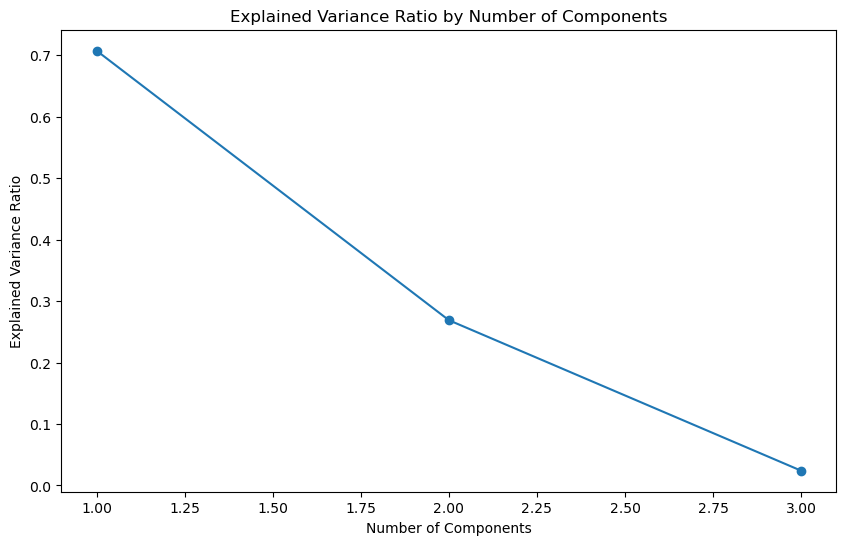

(31, 1)
First few rows of PCA-transformed data:
[[-1.1014726 ]
 [ 0.33792272]
 [-2.26328987]
 [ 1.61622998]
 [-0.56575504]]


In [97]:
scaler = StandardScaler()
data1["Sales Revenue Generated"] = scaler.fit_transform(data1[["Sales Revenue Generated","Interpersonal Skills Rating","Decision-Making Skills Rating"]])


pca = PCA()
temp_pca = pca.fit_transform(data1[["Sales Revenue Generated","Interpersonal Skills Rating","Decision-Making Skills Rating"]])
evr = pca.explained_variance_ratio_

plt.figure(figsize=(10,6))
plt.plot(range(1, len(evr) + 1), evr, marker='o')
plt.title('Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


pca = PCA(n_components=1)
x_pca = pca.fit_transform(data1[["Sales Revenue Generated","Interpersonal Skills Rating","Decision-Making Skills Rating"]])


print(data1[["Sales Revenue Generated"]].shape)
print("First few rows of PCA-transformed data:")
print(x_pca[:5])

In [98]:
from sklearn.decomposition import PCA


In [103]:
from sklearn.model_selection import train_test_split


In [107]:
features = data1[["Sales Revenue Generated", "Interpersonal Skills Rating", "Decision-Making Skills Rating"]]
y = data1["Days Present"] 
scaler = StandardScaler()
scaled = scaler.fit_transform(features)
x_train, x_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(24, 3) (7, 3)
(24,) (7,)
